<a href="https://colab.research.google.com/github/ziedjouini/NLP/blob/main/NLP_4_Bag_of_Words_zied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('https://github.com/xxjjxj945/NLP4-Big-of-words/blob/main/train.csv?raw=true')
train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
train['sentiment'].value_counts(normalize=True)*100

neutral     40.454876
positive    31.229985
negative    28.315138
Name: sentiment, dtype: float64

In [ ]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
train_1=train[train["sentiment"].isin(['positive', 'negative'])]
train_1

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
...,...,...,...,...
27474,b78ec00df5,enjoy ur night,enjoy,positive
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive


In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16363 entries, 1 to 27478
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         16363 non-null  object
 1   text           16363 non-null  object
 2   selected_text  16363 non-null  object
 3   sentiment      16363 non-null  object
dtypes: object(4)
memory usage: 639.2+ KB


In [ ]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
train_1=train[train["sentiment"].isin(['positive', 'negative'])]
train_1

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
...,...,...,...,...
27474,b78ec00df5,enjoy ur night,enjoy,positive
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive


In [ ]:
train_1['sentiment'].value_counts(normalize=True)*100

positive    52.447595
negative    47.552405
Name: sentiment, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


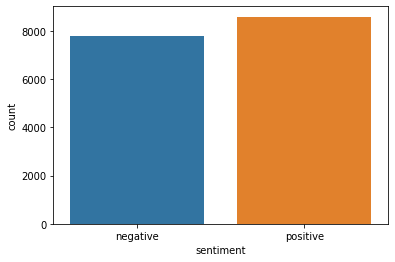

In [ ]:
sns.countplot(train_1['sentiment'])

In [ ]:
X=train_1['text']
X

1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
6        2am feedings for the baby are fun when he is a...
                               ...                        
27474                                       enjoy ur night
27475     wish we could come see u on Denver  husband l...
27476     I`ve wondered about rake to.  The client has ...
27477     Yay good for both of you. Enjoy the break - y...
27478                           But it was worth it  ****.
Name: text, Length: 16363, dtype: object

In [ ]:
y=train_1['sentiment']
y

1        negative
2        negative
3        negative
4        negative
6        positive
           ...   
27474    positive
27475    negative
27476    negative
27477    positive
27478    positive
Name: sentiment, Length: 16363, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,train_size=0.75)

In [ ]:
X_train.shape,X.shape,y_train.shape,y.shape

((12272,), (16363,), (12272,), (16363,))

In [ ]:
#https://www.youtube.com/watch?time_continue=534&v=RZYjsw6P4nI&feature=emb_logo
#https://www.youtube.com/watch?v=h6ZOYyPQiBo
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train,y_train)

CountVectorizer()

In [ ]:
X_train_cv=cv.fit_transform(X_train)

In [ ]:
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
vectorizer.get_feature_names_out()

array(['00', '000', '00am', ..., '½you', '½z', '½ï'], dtype=object)

In [ ]:
print(X_train_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)

cv.get_feature_names_out()

array(['00', '000', '00am', ..., '½you', '½z', '½ï'], dtype=object)

In [ ]:
#https://www.kaggle.com/code/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments
#https://kavita-ganesan.com/how-to-use-countvectorizer/#.Y7P9HRWZPrc
#https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
#vectorizer = CountVectorizer(max_features = 2)
cv = CountVectorizer(stop_words='english',analyzer='word',max_features=6)
X_train_cv = cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)
cv.get_feature_names_out()

array(['day', 'good', 'happy', 'just', 'like', 'love'], dtype=object)

In [ ]:
print(X_test_cv.toarray())

[[0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
X_test_cv.toarray().shape

(4091, 6)

In [ ]:
print(X_train_cv.toarray())

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]]


In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)
cv.get_feature_names_out()

array(['00', '000', '00am', ..., '½you', '½z', '½ï'], dtype=object)

In [ ]:
sparse_matrix = vectorizer.transform(X_test)
sparse_matrix

<4091x15806 sparse matrix of type '<class 'numpy.int64'>'
	with 44633 stored elements in Compressed Sparse Row format>

In [ ]:
model = LogisticRegression().fit(X_train_cv,y_train)

print("score d'exactitude (accuracy) sur l'ensemble d'entraînement :",model.score(X_train_cv, y_train))
print("score d'exactitude (accuracy) sur l'ensemble de test :",model.score(X_test_cv, y_test))

score d'exactitude (accuracy) sur l'ensemble d'entraînement : 0.9663461538461539
score d'exactitude (accuracy) sur l'ensemble de test : 0.8772916157418724


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:806: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(


In [ ]:
model.classes_

array(['negative', 'positive'], dtype=object)

In [ ]:
model.predict(X_test_cv)

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
model.predict_proba(X_test_cv)

array([[0.98175501, 0.01824499],
       [0.99318462, 0.00681538],
       [0.42748507, 0.57251493],
       ...,
       [0.67954513, 0.32045487],
       [0.85221114, 0.14778886],
       [0.00350813, 0.99649187]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test_cv)))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1935
    positive       0.89      0.88      0.88      2156

    accuracy                           0.88      4091
   macro avg       0.88      0.88      0.88      4091
weighted avg       0.88      0.88      0.88      4091



In [ ]:
# You can execute this code to get the confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_cv))
cm

array([[1700,  235],
       [ 267, 1889]])

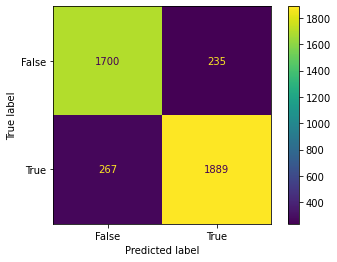

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = model.predict(X_test_cv)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
proba=model.predict_proba(X_test_cv)
proba

array([[0.98175501, 0.01824499],
       [0.99318462, 0.00681538],
       [0.42748507, 0.57251493],
       ...,
       [0.67954513, 0.32045487],
       [0.85221114, 0.14778886],
       [0.00350813, 0.99649187]])

In [ ]:
model.classes_

array(['negative', 'positive'], dtype=object)

In [ ]:
df=pd.DataFrame(proba,columns=['negative', 'positive'])
df

,negative,positive
0,0.981755,0.018245
1,0.993185,0.006815
2,0.427485,0.572515
3,0.000245,0.999755
4,0.560314,0.439686
...,...,...
4086,0.633287,0.366713
4087,0.854715,0.145285
4088,0.679545,0.320455
4089,0.852211,0.147789


In [ ]:
df_join=train_1.join(df)
df_join

,textID,text,selected_text,sentiment,negative,positive
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.993185,0.006815
2,088c60f138,my boss is bullying me...,bullying me,negative,0.427485,0.572515
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.000245,0.999755
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.560314,0.439686
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,0.179374,0.820626
...,...,...,...,...,...,...
27474,b78ec00df5,enjoy ur night,enjoy,positive,NaN,NaN
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,NaN,NaN
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,NaN,NaN
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,NaN,NaN


In [ ]:
predict=model.predict(X_test_cv)
predict

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
df_pred=pd.DataFrame(predict,columns=['pred_sentiment'])
df_pred

,pred_sentiment
0,negative
1,negative
2,positive
3,positive
4,negative
...,...
4086,negative
4087,negative
4088,negative
4089,negative


In [ ]:
df_join_pred=train_1.join(df_pred)
df_join_pred

,textID,text,selected_text,sentiment,pred_sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,negative
2,088c60f138,my boss is bullying me...,bullying me,negative,positive
3,9642c003ef,what interview! leave me alone,leave me alone,negative,positive
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,negative
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,positive
...,...,...,...,...,...
27474,b78ec00df5,enjoy ur night,enjoy,positive,NaN
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,NaN
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,NaN
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,NaN


In [ ]:
df_totale=df_join_pred.loc[df_join_pred['sentiment']!=df_join_pred['pred_sentiment']]
df_totale.head(10)

,textID,text,selected_text,sentiment,pred_sentiment
2,088c60f138,my boss is bullying me...,bullying me,negative,positive
3,9642c003ef,what interview! leave me alone,leave me alone,negative,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,negative
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive,negative
16,3440297f8b,"S`ok, trying to plot alternatives as we speak...",*sigh*,negative,positive
18,af3fed7fc3,is back home now gonna miss every one,onna,negative,positive
26,852edc3769,I`m sorry.,I`m sorry.,negative,positive
29,d22e6d40a7,Went to sleep and there is a power cut in Noid...,Power back up not working too,negative,positive
30,d33f811375,I`m going home now. Have you seen my new twitt...,Quite....heavenly,positive,negative
32,1c31703aef,If it is any consolation I got my BMI tested ...,well so much for being unhappy for about 10 mi...,negative,positive
